## Define and Run the Tor-ORd Model in Myokit

**Import packages:** The following code is used to add and import the code necessary for running the Tor-ORd model

In [1]:
import myokit
import matplotlib.pyplot as plt
import numpy as np

**Run a pacing simulation:** This code will load in the myokit file, create a simulation object that includes the model (`mod`) and default protocol (`proto`), and then run the simulation. The default protocol for this model is 1 Hz pacing.

In [2]:
mod, proto, x = myokit.load('./tor_ord_endo.mmt')
sim = myokit.Simulation(mod, proto)
dat_normal = sim.run(10000)

In this code, `sim.run()` returns an object that is saved to `dat_normal`. This object is a Myokit DataLog (but that's not important at the moment) – you can think of it like a dictionary data structure. To access data from the `dat_normal` object, you can type in a key that is linked to the data you want, for example: `dat_normal['engine.time']` will return a list of times. You need to look in your `.mmt` file (e.g. `tor_ord_endo.mmt`) to determine the variables available to you. In `tor_ord_endo.mmt`, all of the state variables are listed on the first 50 lines. However, you also have access to any other variables that change throughout the protocol. Take, for example, `membrane.i_ion`, which records the ionic current flowing through the cell membrane. This variable is created in the `[membrane]` group on line 921. You can type `dat_normal['membrane.i_ion']` to access these values.

**Plot the results:** The following code will plot the results. If you're not used to plotting with Matplotlib, feel free to mess around with the following code.

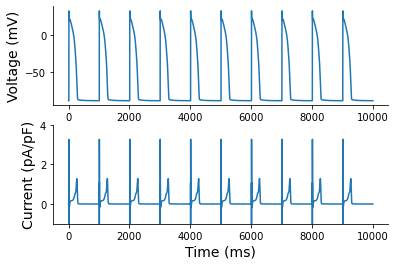

In [8]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(dat_normal['engine.time'], dat_normal['membrane.v'])
axs[1].plot(dat_normal['engine.time'], dat_normal['membrane.i_ion'])

for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
axs[1].set_xlabel('Time (ms)', fontsize=14)
axs[0].set_ylabel('Voltage (mV)', fontsize=14)
axs[1].set_ylabel('Current (pA/pF)', fontsize=14)

axs[1].set_ylim(-1, 4)
plt.show()

**Scale a conductance:** Now, let's say you want to adjust a conductance parameter in your model to increase the calcium current. If you open `tor_ord_endo.mmt`, you'll see a group of parameters called `multipliers`. It should look like:

```
[multipliers]
i_cal_pca_multiplier = 1
i_kr_multiplier = 1
i_ks_multiplier = 1
i_nal_multiplier = 1
jup_multiplier = 1
```

These parameters can be used used to adjust the size of a current. At the moment, you can only adjust ICaL, IKr, IKs, INaL, and Jup. These variables are all set to 1, which means the current will be equal to the default Tor-ORd current. In the code below, I used `mod['multipliers']['i_cal_pca_multiplier'].set_rhs(8)` to increase the conductance of ICaL to 8x the default value. 

In [9]:
mod, proto, x = myokit.load('./tor_ord_endo.mmt')
mod['multipliers']['i_cal_pca_multiplier'].set_rhs(8)
sim = myokit.Simulation(mod, proto)
dat_ical_scale = sim.run(10000)

**Plot the results:** The code below plots the results of the above simulation – it looks quite a bit different. The eighth and tenth action potentials have an early after depolarization, which is caused by the increase in ICaL. 

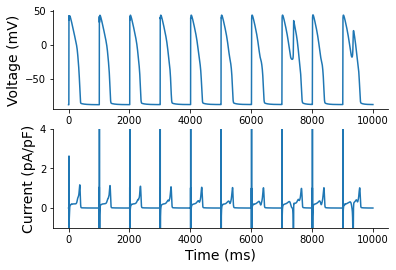

In [11]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(dat_ical_scale['engine.time'], dat_ical_scale['membrane.v'])
axs[1].plot(dat_ical_scale['engine.time'], dat_ical_scale['membrane.i_ion'])

for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
axs[1].set_xlabel('Time (ms)', fontsize=14)
axs[0].set_ylabel('Voltage (mV)', fontsize=14)
axs[1].set_ylabel('Current (pA/pF)', fontsize=14)

axs[1].set_ylim(-1, 4)
plt.show()